In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from sklearn import datasets, linear_model

## Lineal

$ x \to x_s $

### min-max

$ x_s = \frac{2x-min-max}{max-min}$

### clipping

$ x_s = \left \{ 
            \begin{aligned} 
                max, \text{ if } x > max\\ 
                min, \text{ if } x < min 
            \end{aligned} \right .$

### z-score

$x_s =  \frac{x-\mu}{\sigma}$

## Non lineal

### hyperbolic tan

$x_s =  \tanh{\frac{x}{a}}$

### root

$x_s = \sqrt{x}$

In [3]:
X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

In [38]:
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

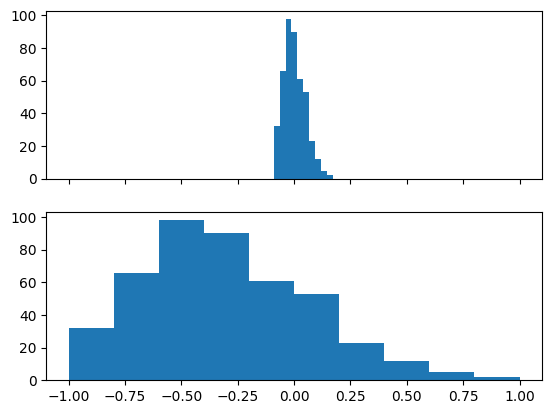

In [39]:
fig, axs = plt.subplots(2, 1, sharex = True)
axs[0].hist(raw)
axs[1].hist(scaled)

In [45]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

In [46]:
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [49]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)
print(raw_time)
print(scaled_time)

0.04748930000641849
0.04503829999885056


In [51]:
mean = np.mean(raw)
std = np.std(raw)
z_score = (raw - mean)/std

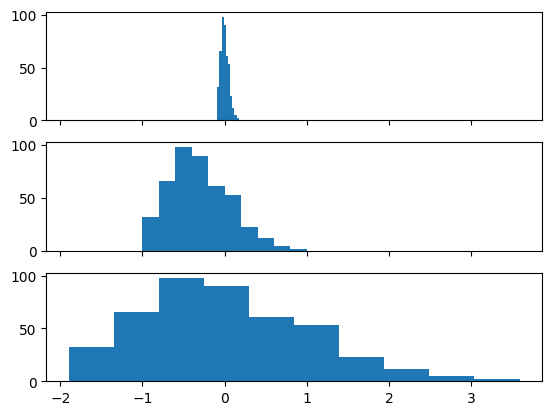

In [53]:
fig, axs = plt.subplots(3, 1, sharex = True)
axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_score)
plt.show()

In [55]:
df = pd.read_csv('cars.csv')
df.head(4)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86


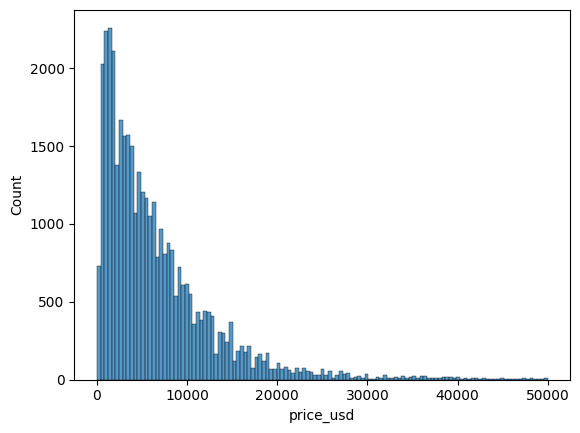

In [61]:
sns.histplot(data = df, x = 'price_usd')
plt.show()

In [62]:
pd.get_dummies(df['engine_type'])

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


In [64]:
from cgitb import handler
import sklearn.preprocessing as preprocessing
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [65]:
encoder.fit(df[['engine_type']].values)

OneHotEncoder(handle_unknown='ignore')

In [66]:
encoder.transform([['gasoline'],['diesel'],['aceite']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [67]:
encoder.fit(df[['year_produced']].values)

OneHotEncoder(handle_unknown='ignore')

In [69]:
encoder.transform([[2016],[2009],[1890]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [72]:
from sklearn.preprocessing import StandardScaler
iris = sns.load_dataset('iris')

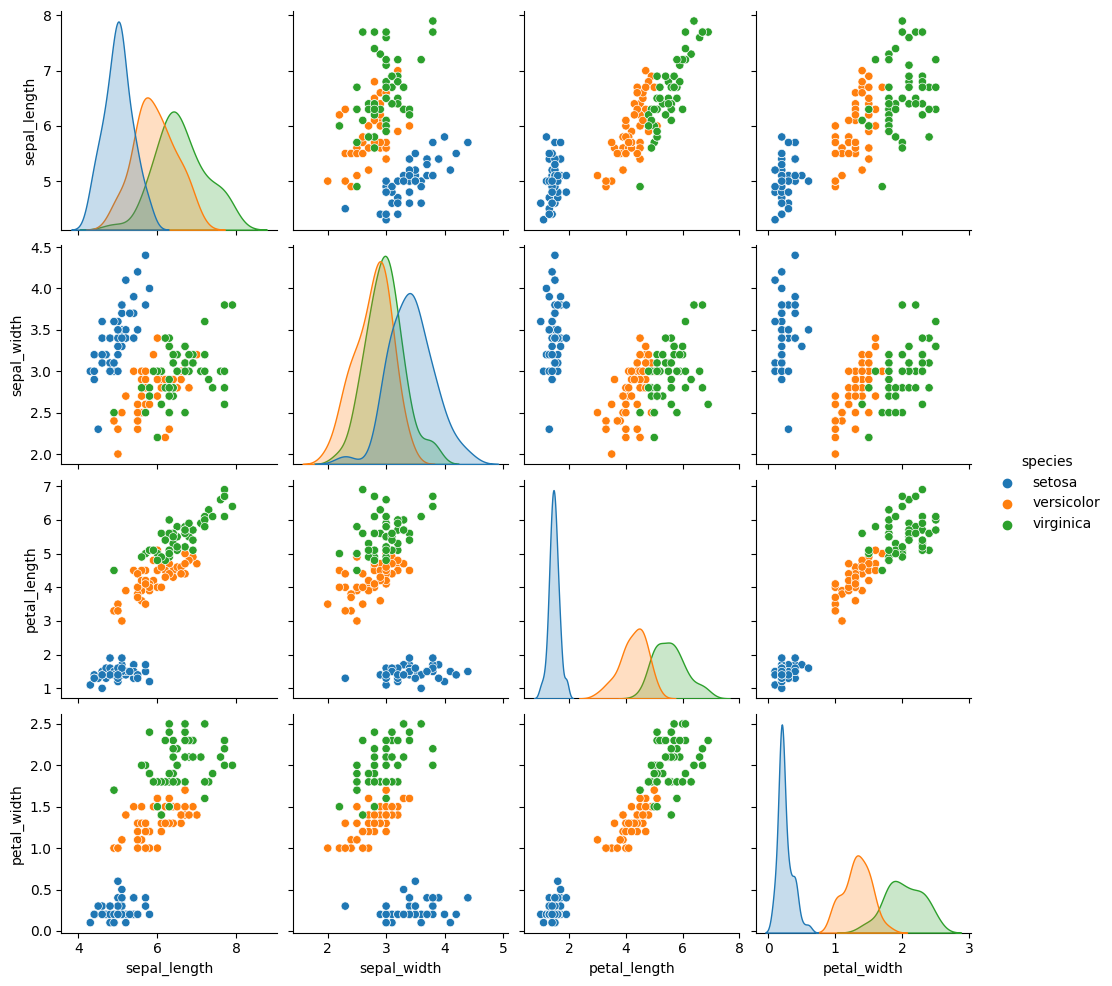

In [74]:
sns.pairplot(iris, hue='species')

In [75]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [79]:
scaler = StandardScaler()
scaled = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [82]:
coavariance_matrix = np.cov(scaled.T)
coavariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

<AxesSubplot: >

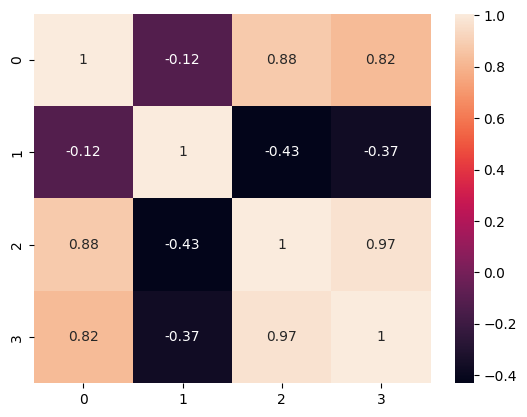

In [85]:
sns.heatmap(coavariance_matrix, annot=True)

### PCA

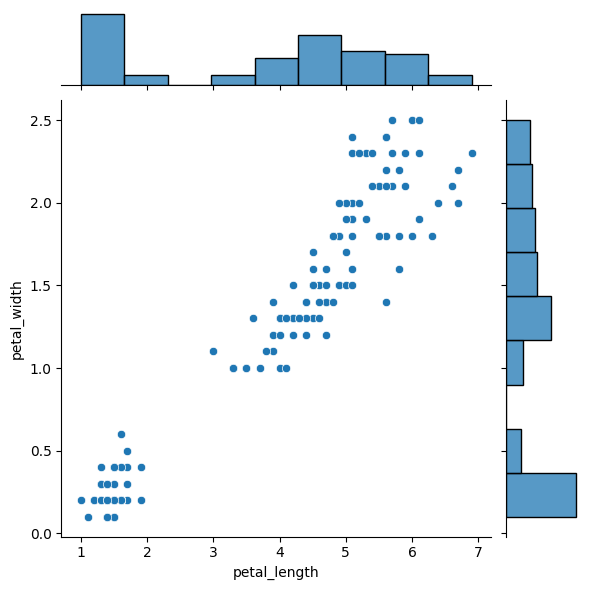

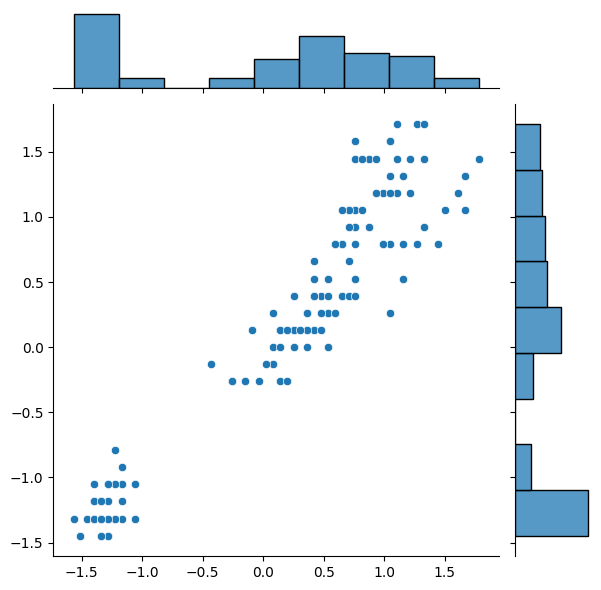

In [88]:
sns.jointplot(x=iris['petal_length'], y=iris['petal_width'])
sns.jointplot(x=scaled[:,2],y=scaled[:,3])

In [89]:
eigen_values, eigen_vectors = np.linalg.eig(coavariance_matrix)

In [90]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [91]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [93]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.96244541329987, 22.850761786701774, 3.668921889282877, 0.51787091071548]


In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [104]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [105]:
reduce_scaled = pca.transform(scaled)
reduce_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

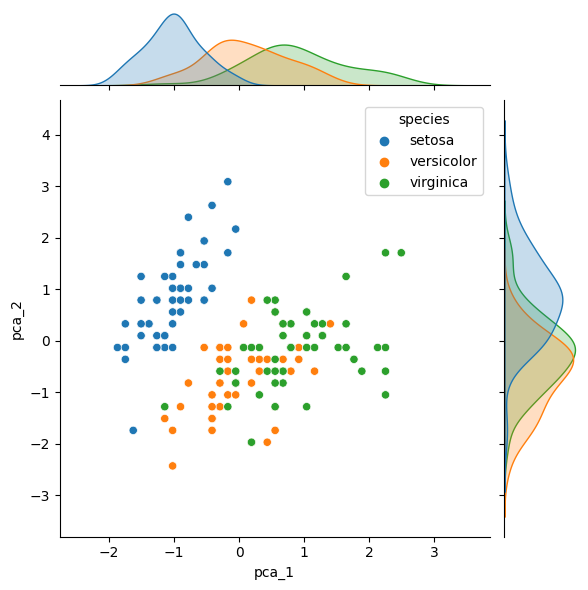

In [110]:
iris['pca_1'] = scaled[:,0]
iris['pca_2'] = scaled[:,1]
sns.jointplot(x = iris['pca_1'], y = iris['pca_2'], hue=iris['species'])